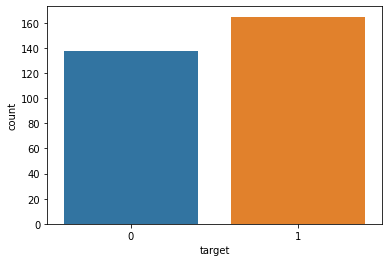

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from six import StringIO
from IPython.display import Image
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
import pydotplus

df = pd.read_csv('./heart.csv', index_col=0)
# df.info(show_counts=True)
# Nie ma pustych komórek
sns.countplot(x='target', data=df)


In [ ]:
x_train, x_test, Y_train, Y_test = train_test_split(df.iloc[:, :12], df.iloc[:, 12], test_size=0.25, random_state=101)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [ ]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
print(f'y = {model.coef_[0]}x + {model.intercept_}')
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print(f'Mean Squared Error: {mean_squared_error(Y_test, y_pred)}')
print(f'Root Mean Squared Error: { np.sqrt(mean_squared_error(Y_test, y_pred))}')
print(f'R2(train): {r2_score(Y_train, y_train_pred)}')
print(f'R2(test): {r2_score(Y_test, y_pred)}')

y = [-0.7155376   0.86905864 -0.37416589 -0.24939024  0.20660175  0.21327922
  0.43837393 -0.46457365 -0.50862511  0.46265274 -0.79082741 -0.49765174]x + [0.23901804]
Mean Squared Error: 0.17105263157894737
Root Mean Squared Error: 0.4135850959342556
R2(train): 0.41136256482791145
R2(test): 0.3153153153153152


In [ ]:
cnf_matrix = metrics.confusion_matrix(Y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))
print("Precision:",metrics.precision_score(Y_test, y_pred))
print("Recall:",metrics.recall_score(Y_test, y_pred))

Accuracy: 0.8289473684210527
Precision: 0.7954545454545454
Recall: 0.8974358974358975


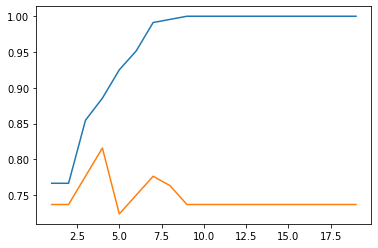

In [ ]:
i_list = []
test_list = []
train_list = []
for i in range(1, 20):
    clf = DecisionTreeClassifier(max_depth=i, random_state=42)
    clf = clf.fit(X_train, Y_train)
    test_score = clf.score(X_test, Y_test)
    train_score = clf.score(X_train, Y_train)
    i_list.append(i)
    test_list.append(test_score)
    train_list.append(train_score)
plt.plot(i_list, train_list)
plt.plot(i_list, test_list)
plt.show()

In [ ]:
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)

feature_names = df.iloc[:, :12].columns

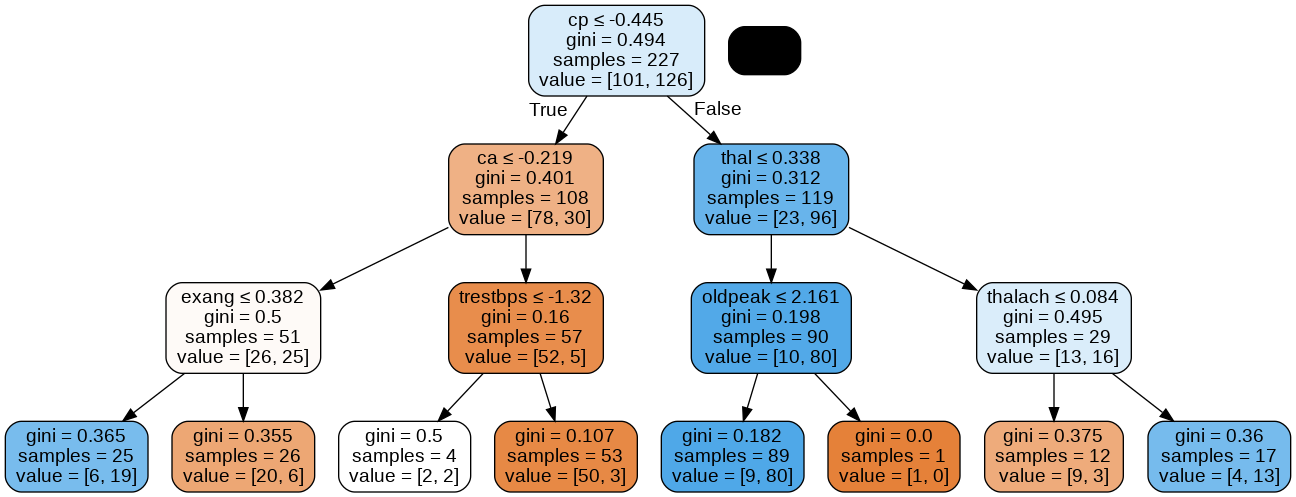

In [ ]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=feature_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [ ]:
cnf_matrix = metrics.confusion_matrix(Y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))
print("Precision:",metrics.precision_score(Y_test, y_pred))
print("Recall:",metrics.recall_score(Y_test, y_pred))

Accuracy: 0.7763157894736842
Precision: 0.75
Recall: 0.8461538461538461


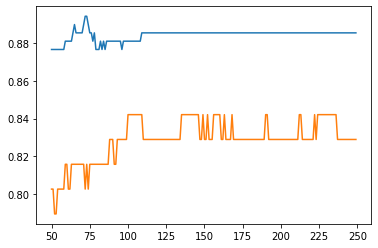

In [ ]:
i_list = []
test_list = []
train_list = []
for i in range(50, 250):
    clf = RandomForestClassifier(n_estimators=i, random_state=101, max_depth=3)
    clf = clf.fit(X_train, Y_train)
    test_score = clf.score(X_test, Y_test)
    train_score = clf.score(X_train, Y_train)
    i_list.append(i)
    test_list.append(test_score)
    train_list.append(train_score)
plt.plot(i_list, train_list)
plt.plot(i_list, test_list)
plt.show()

In [ ]:
clf = RandomForestClassifier(n_estimators=7, random_state=101)
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)

cnf_matrix = metrics.confusion_matrix(Y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))
print("Precision:",metrics.precision_score(Y_test, y_pred))
print("Recall:",metrics.recall_score(Y_test, y_pred))

Accuracy: 0.8026315789473685
Precision: 0.8
Recall: 0.8205128205128205
